# Classification and Regression Models with Validation Curves

**Goal:**
In this notebook, I explore different machine learning models (linear regression, logistic regression, & non-linear models like KNN, Decision Trees, & Random Forest)
I use validation curves to tune hyperparameters & evaluate model performance using metrics such as MAE, RMSE, & cross-entropy loss

## Importies

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import warnings
import io, requests
from sklearn.preprocessing import scale, StandardScaler


# 1. Linear Regression

## Data Preparation

The slope is -1.25 and the intercept is 4.51.



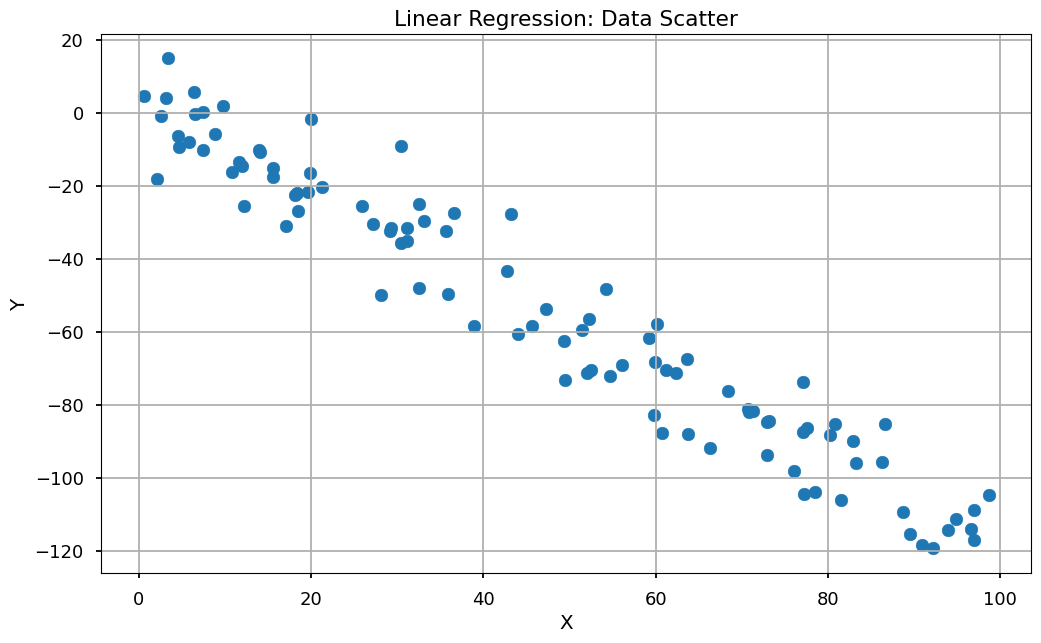

In [ ]:
np.random.seed(42)
w, b = np.random.uniform(-5,5, 2)
print(f'The slope is {w:.2f} and the intercept is {b:.2f}.\n')

ns = 100
noise = 10

X = np.sort(np.random.uniform(0,100,ns))
Y = w*X + b + np.random.normal(0,noise, ns)

fig = plt.figure()
plt.scatter(X, Y)
plt.title("Linear Regression: Data Scatter")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## Splitting into train & test 

In [28]:
# Assume X is your feature matrix, y is your target vector
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## Model (Linear Regression)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)

coefficent = model.coef_
intercept = model.intercept_

print("Linear Regression Coefficient:", coefficent)
print("Linear Regression Intercept:", intercept)

Linear Regression Coefficient: [-1.20986871]
Linear Regression Intercept: 2.7151908835800427


## Evaluation Metrics (Linear Regression)

### 1. MAE

In [30]:
# mikowsky p=1 (Mean Absolute Error) (p is the penalty the more is better accuracy) (minkowsky is better for regression than classification)
y_pred = model.predict(X_test.reshape(-1,1))
mae=np.sum(abs(y_pred-y_test))/len(y_pred)
print("MAE:", mae)

MAE: 6.316650480822851


### 2. RMSE

In [31]:
# mikowsky p=2 (RMSE)
y_pred = model.predict(X_test.reshape(-1,1))
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)

RMSE: 8.255166362770542


### 3. Minkowsky

In [32]:
#minkowsky loss function
def minkowski(yt, yp, penalty):
  return (np.sum(np.abs(yt - yp)**penalty))**(1/penalty)

p=20
print("Minkowski Loss:", minkowski(y_test, y_pred, p))

Minkowski Loss: 16.51564189114119


# 2. linear classification

## Data Preparation

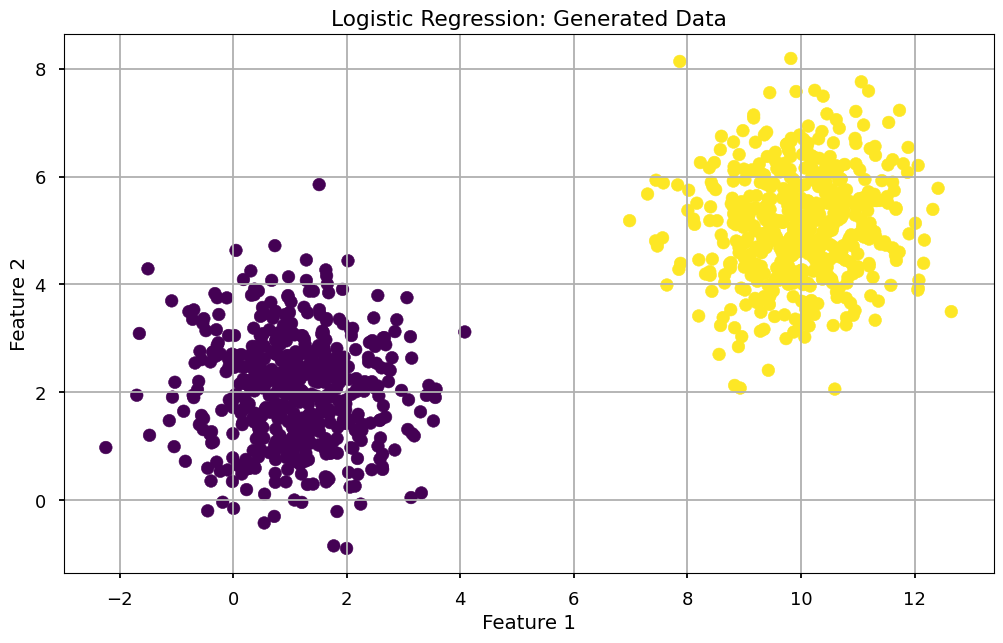

In [33]:
a, b = make_blobs(n_samples=1000,centers=[[1,2], [10,5]])
plt.scatter(*a.T, c=b)
plt.rc('figure', figsize=(5,4) )
plt.title("Logistic Regression: Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

#train test splitting
atrain, atest, btrain, btest = train_test_split(a, b, test_size=0.2, random_state=42)

## Model (logistic regression)

In [34]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(atrain, btrain);

## Accuracy

In [35]:
ypred=model.predict(atest)
accuracy=accuracy_score(btest, ypred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 1.0


## Loss (cross-Entropy)

In [36]:
def cross_entropy(yt, yp, eps=1e-15):
    yp = np.clip(yp, eps, 1 - eps)  #avoid log(0)
    return -np.mean(yt * np.log(yp) + (1 - yt) * np.log(1 - yp))

#logistic regression probabilities (needed for cross-entropy)
ypred_proba = model.predict_proba(atest)[:, 1]
ce_loss = cross_entropy(btest, ypred_proba)
print("Cross Entropy Loss:", ce_loss)

Cross Entropy Loss: 0.001125569838723215


# 3. Non-Linear Models


## 3.1. K-Nearest Neighbors (KNN)

### Data Preparation

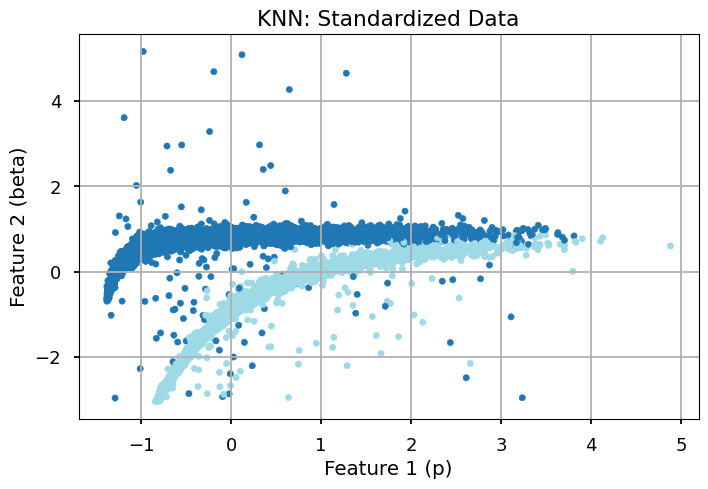

In [37]:
plt.style.use('seaborn-v0_8-talk')
plt.rc('figure', figsize=(12,7) ) 
warnings.filterwarnings('ignore')


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')
X, Y = data['X'], data['Y']

scaler = StandardScaler()
X = scaler.fit_transform(X)


#train test splitting
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(X , Y, random_state=0)

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.tab20, s=20)
plt.title("KNN: Standardized Data")
plt.xlabel("Feature 1 (p)")
plt.ylabel("Feature 2 (beta)")
plt.grid(True)
plt.show()

### Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4,weights="uniform")
model.fit(Xk_train,Yk_train);

### Loss

In [39]:
Y_predk= model.predict(Xk_test)
loss=np.sum(abs(Y_predk-Yk_test))/len(Yk_test)
print("KNN Misclassification Rate:", loss)

KNN Misclassification Rate: 0.01007979840403192


### Validation Curve

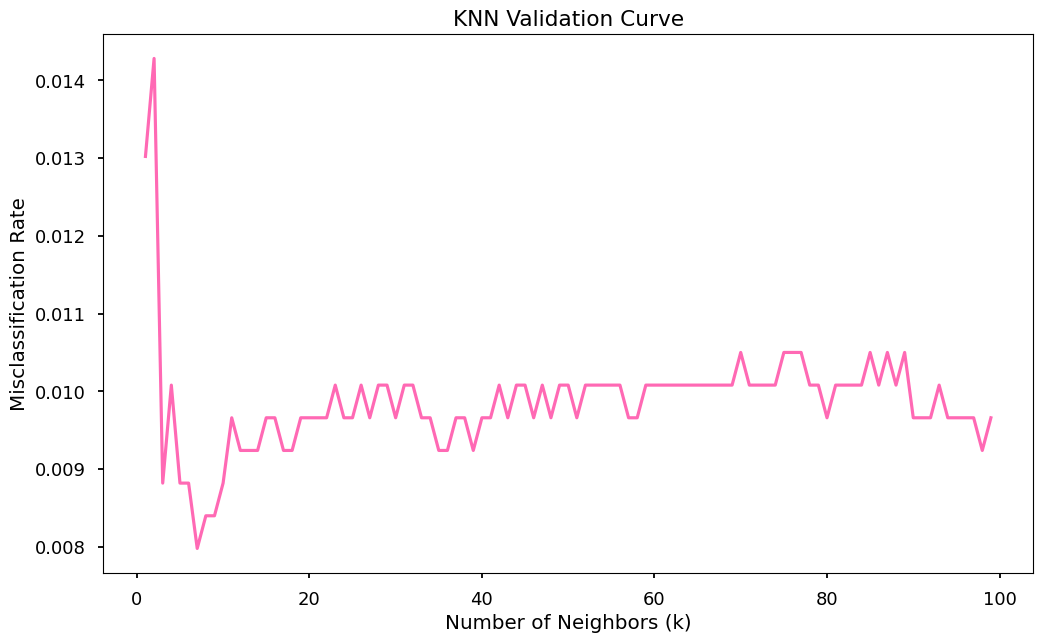

In [40]:
#validation curve : is needed to tune the hyperparameter
#the hyper parameter: neighbor numbers(k)
allloss=[]
allk=[]
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i,weights="uniform")
    model.fit(Xk_train,Yk_train)
    #loss
    Y_predk= model.predict(Xk_test)
    loss1=np.mean(np.abs(Y_predk-Yk_test))
    allloss.append(loss1)
    allk.append(i)
plt.plot(allk, allloss, color='hotpink')
plt.title("KNN Validation Curve")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Misclassification Rate")
plt.show()

## 3.2. Decision Tree

### Data Preparation

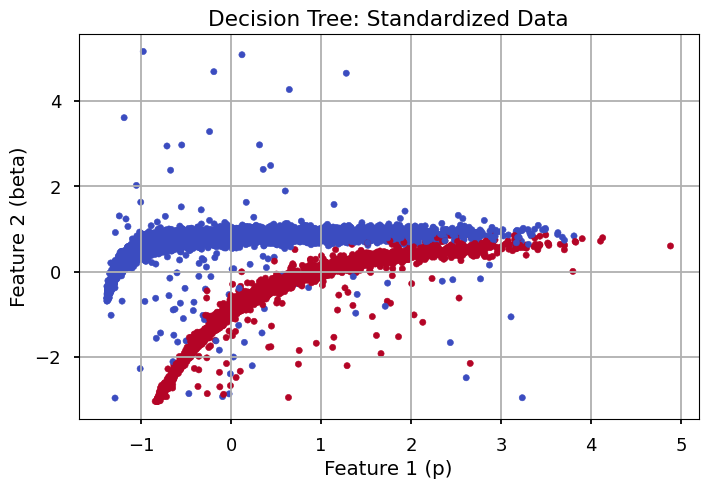

In [41]:
from sklearn.tree import DecisionTreeClassifier

#data loading
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally: data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']
X = scale(X)

#train test splitting
Xdt_train, Xdt_test, Ydt_train, Ydt_test = train_test_split(X , Y, random_state=0)

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)
plt.title("Decision Tree: Standardized Data")
plt.xlabel("Feature 1 (p)")
plt.ylabel("Feature 2 (beta)")
plt.grid(True)
plt.show()

### Model

In [42]:
model=DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(Xdt_train,Ydt_train);

### Loss

In [43]:
Ydt_pred = model.predict(Xdt_test)
loss=1 - accuracy_score(Ydt_test, Ydt_pred)  # Misclassification rate
print("Decision Tree misclassification rate:", loss)


Decision Tree misclassification rate: 0.016379672406551915


### Validation Curve

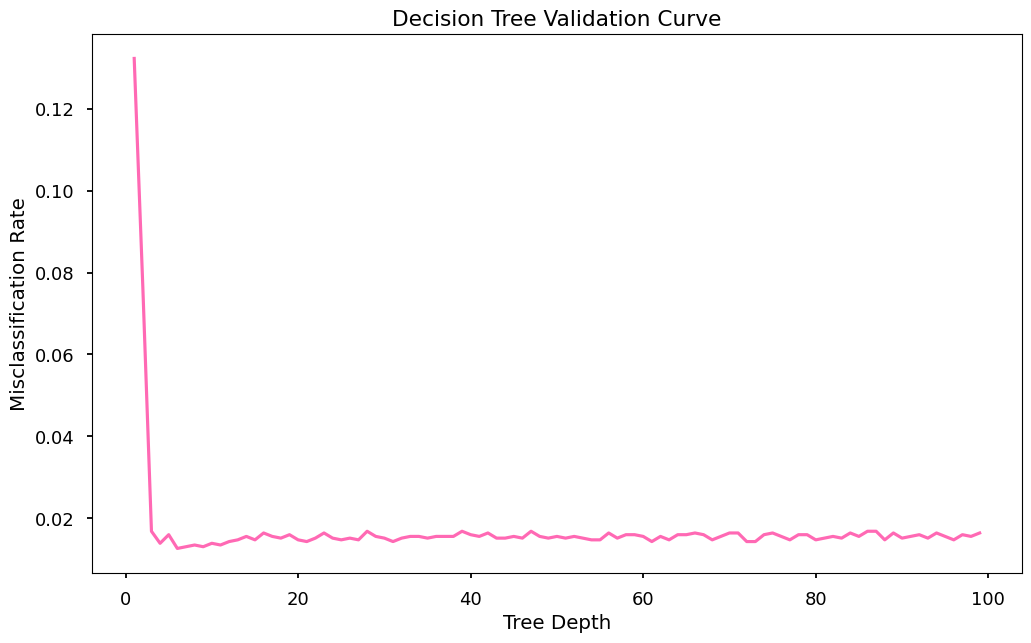

In [44]:
#validation curve : is needed to find the hyperparameter (depth)
allloss=[]
alldepth=[]
for i in range(1,100):
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(Xdt_train,Ydt_train)
    Ydt_pred= model.predict(Xdt_test)
    lossnew=1 - accuracy_score(Ydt_test, Ydt_pred)
    allloss.append(lossnew)
    alldepth.append(i)

plt.plot(alldepth, allloss, color='hotpink')
plt.title("Decision Tree Validation Curve")
plt.xlabel("Tree Depth")
plt.ylabel("Misclassification Rate")
plt.show()

### Loss (Minkowsky)

In [45]:
p=1000
lossminkowski=minkowski(Ydt_test,Ydt_pred,p)
print("Decision Tree Minkowski Loss:", lossminkowski)

Decision Tree Minkowski Loss: 1.0036702806908029


## 3.3. Random Forest

### Data Preparation

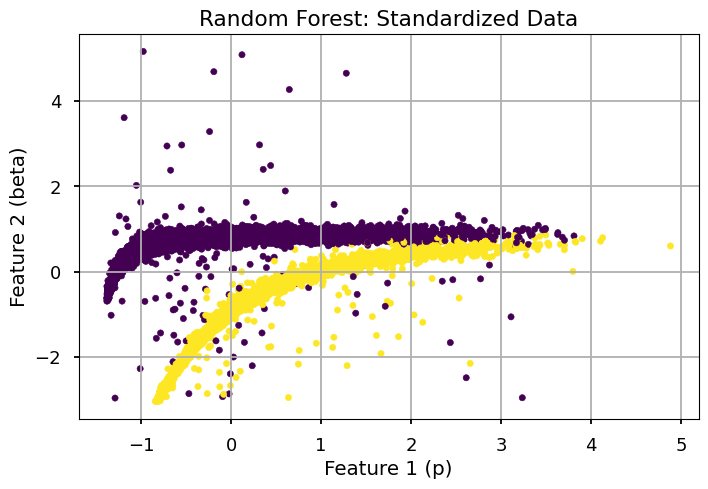

In [46]:
from sklearn.ensemble import RandomForestClassifier

url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally: data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

X = scale(X)
Xrf_train, Xrf_test, Yrf_train, Yrf_test = train_test_split(X , Y, random_state=0)

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.viridis, s=20)
plt.title("Random Forest: Standardized Data")
plt.xlabel("Feature 1 (p)")
plt.ylabel("Feature 2 (beta)")
plt.grid(True)
plt.show()

### Model

In [47]:
model= RandomForestClassifier(n_estimators=3,max_depth=3, random_state=42)
model.fit(Xrf_train, Yrf_train);

### Loss Function (Misclassification Rate)

In [48]:
Yrf_pred= model.predict(Xrf_test)
loss=1 - accuracy_score(Yrf_test, Yrf_pred)
print("Random Forest Misclassification Rate:", loss)

Random Forest Misclassification Rate: 0.02057958840823182


### Validation Curve

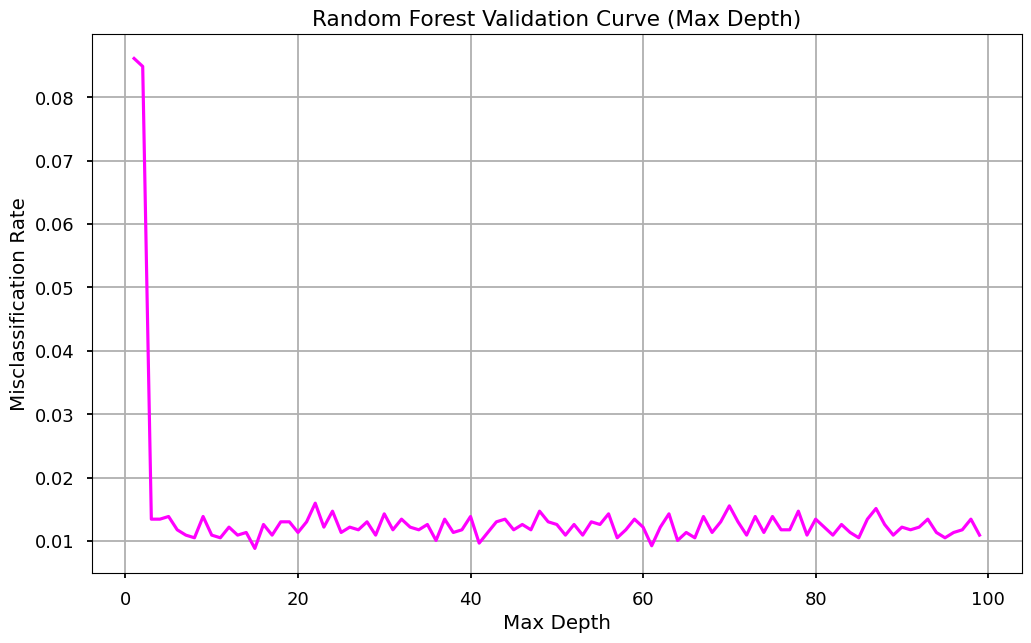

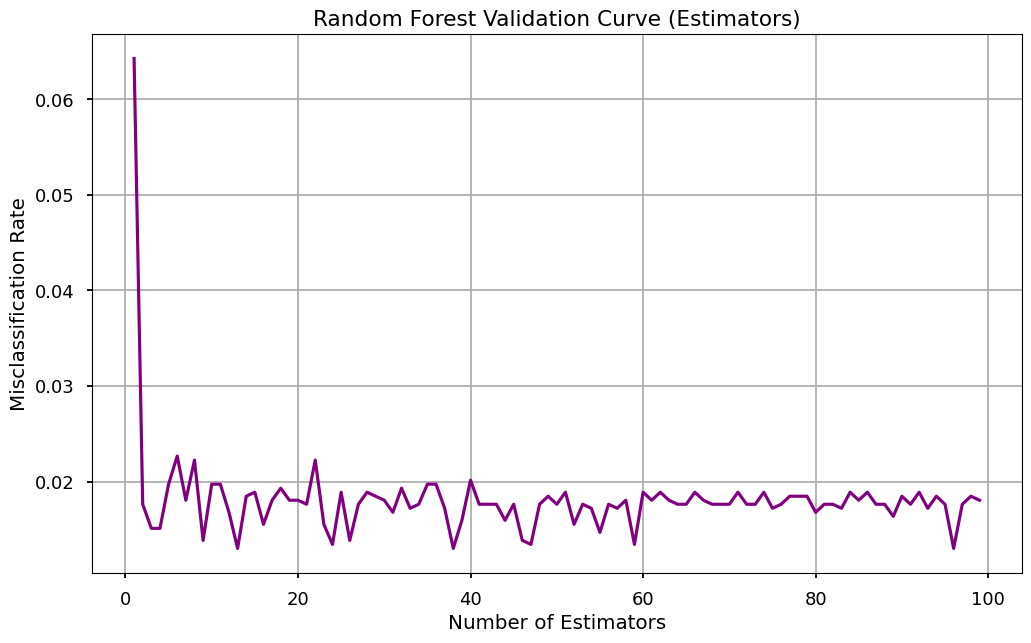

In [49]:
#validation curve is needed to tune the hyperparameter (depth)
allloss=[]
alldepth=[]
for i in range(1,100):
    model= RandomForestClassifier(n_estimators=3,max_depth=i)
    model.fit(Xrf_train, Yrf_train)
    Yrf_pred= model.predict(Xrf_test)
    lossrf=np.sum(abs(Yrf_pred-Yrf_test))/len(Yrf_test)
    allloss.append(lossrf)
    alldepth.append(i)

plt.plot(alldepth, allloss, color='magenta')
plt.title("Random Forest Validation Curve (Max Depth)")
plt.xlabel("Max Depth")
plt.ylabel("Misclassification Rate")
plt.grid(True)
plt.show()


allestimator=[]
allloss=[]
for j in range(1,100):
    model= RandomForestClassifier(n_estimators=j,max_depth=3)
    model.fit(Xrf_train, Yrf_train)
    Yrf_pred= model.predict(Xrf_test)
    lossrf=np.sum(abs(Yrf_pred-Yrf_test))/len(Yrf_test)
    allloss.append(lossrf)
    allestimator.append(j)

plt.figure()
plt.plot(allestimator, allloss, color='purple')
plt.title("Random Forest Validation Curve (Estimators)")
plt.xlabel("Number of Estimators")
plt.ylabel("Misclassification Rate")
plt.grid(True)
plt.show()

### Loss (Minkowski)

In [ ]:
p=200
print("Random Forest Minkowski Loss:", minkowski(Ydt_test, Ydt_pred, p))

Decision Tree Minkowski Loss: 1.018486608387564
